In [ ]:
!conda install -y gdown

Retrieving notices: ...working... done
done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.5.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.5.0



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - gdown


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    filelock-3.14.0            |     pyhd8ed1ab_0          16 KB  conda-forge
    gdown-5.2.0                |     pyhd8ed1ab_0          21 KB  conda-forge
    openssl-3.3.0              |       hd590300_0         2.8 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.8 MB

The following NEW packages will be 

In [ ]:
#https://drive.google.com/file/d/1-536u3rUUVZE-UXP_0MHHPE_O8Dz_ozQ/view?usp=sharing
!gdown --id 1-536u3rUUVZE-UXP_0MHHPE_O8Dz_ozQ

/opt/conda/lib/python3.10/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1-536u3rUUVZE-UXP_0MHHPE_O8Dz_ozQ
From (redirected): https://drive.google.com/uc?id=1-536u3rUUVZE-UXP_0MHHPE_O8Dz_ozQ&confirm=t&uuid=935b524c-c86d-4d49-9619-c16de662248b
To: /kaggle/working/HindiSeg.tar.gz
100%|██████████████████████████████████████| 1.82G/1.82G [00:24<00:00, 73.2MB/s]


In [ ]:
!tar -xzf HindiSeg.tar.gz

In [ ]:
# !cd /kaggle/input/htrs-additional/lexicon.txt

In [ ]:
!ls

HindiSeg  HindiSeg.tar.gz


In [ ]:
import shutil

# Define the source and destination paths
source_path = "/kaggle/input/htrs-additional/train.txt"
destination_path = "/kaggle/working/HindiSeg"

# Copy the file
shutil.copy(source_path, destination_path)

'/kaggle/working/HindiSeg/train.txt'

In [ ]:
source_path = "/kaggle/input/htrs-additional/val.txt"
destination_path = "/kaggle/working/HindiSeg"

# Copy the file
shutil.copy(source_path, destination_path)

'/kaggle/working/HindiSeg/val.txt'

In [ ]:
source_path = "/kaggle/input/htrs-additional/test.txt"
destination_path = "/kaggle/working/HindiSeg"

# Copy the file
shutil.copy(source_path, destination_path)

'/kaggle/working/HindiSeg/test.txt'

In [ ]:
source_path = "/kaggle/input/htrs-additional/lexicon.txt"
destination_path = "/kaggle/working/HindiSeg"

# Copy the file
shutil.copy(source_path, destination_path)

'/kaggle/working/HindiSeg/lexicon.txt'

In [ ]:
source_path = "/kaggle/input/htrs-additional/hindi_vocab.txt"
destination_path = "/kaggle/working/HindiSeg"

# Copy the file
shutil.copy(source_path, destination_path)

'/kaggle/working/HindiSeg/hindi_vocab.txt'

In [ ]:
source_path = "/kaggle/input/htrs-additional/Lohit-Devanagari.ttf"
destination_path = "/kaggle/working/HindiSeg"

# Copy the file
shutil.copy(source_path, destination_path)

'/kaggle/working/HindiSeg/Lohit-Devanagari.ttf'

In [ ]:
import os

def read_vocab(vocab_file):
    """
    Read the Hindi vocabulary file to create a mapping between unique words and their vocab IDs.
    """
    vocab = {}
    with open(vocab_file, 'r', encoding='utf-8') as f:
        for line in f:
            word = line.strip()
            vocab[word] = len(vocab)  # Assign a unique ID to each word
    return vocab

def parse_dataset(dataset_file):
    """
    Parse the train, val, or test files to create lists of image paths and their corresponding labels.
    """
    image_paths = []
    labels = []
    with open(dataset_file, 'r') as f:
        for line in f:
            image_path, label = line.strip().split()
            image_paths.append(os.path.join("HindiSeg",image_path))
            labels.append(label)
    return image_paths, labels

def create_unique_ids(vocab):
    """
    Create unique IDs for words in the vocabulary.
    """
    unique_ids = {word: idx for word, idx in vocab.items()}
    return unique_ids

# Paths to dataset files
train_file = '/kaggle/input/htrs-additional/train.txt'
val_file = '/kaggle/input/htrs-additional/val.txt'
test_file = '/kaggle/input/htrs-additional/test.txt'
vocab_file = '/kaggle/input/htrs-additional/hindi_vocab.txt'
lexicon_file = '/kaggle/input/htrs-additional/lexicon.txt'

# Read the vocabulary file
vocab = read_vocab(vocab_file)

# Create unique IDs for words in the vocabulary
unique_ids = create_unique_ids(vocab)

# Parse the dataset files
train_image_paths, train_labels = parse_dataset(train_file)
val_image_paths, val_labels = parse_dataset(val_file)
test_image_paths, test_labels = parse_dataset(test_file)

# Optionally, you can also read the lexicon file
lexicon = []
with open(lexicon_file, 'r') as f:
    for line in f:
        lexicon.append(line.strip())

# Print a sample of the parsed data
print("Sample train data:")
for image_path, label in zip(train_image_paths[:5], train_labels[:5]):
    print(f"Image Path: {image_path}, Label: {label}")

# Similarly, print sample data for validation and test sets


Sample train data:
Image Path: HindiSeg/HindiSeg/train/8/251/21.jpg, Label: केंद्रों
Image Path: HindiSeg/HindiSeg/train/10/207/8.jpg, Label: पॉवर
Image Path: HindiSeg/HindiSeg/train/10/31/19.jpg, Label: तरक्की
Image Path: HindiSeg/HindiSeg/train/5/246/23.jpg, Label: मजा
Image Path: HindiSeg/HindiSeg/train/8/266/25.jpg, Label: मांजने


In [ ]:
import cv2
import numpy as np

In [ ]:
import numpy as np
import cv2


def preprocess(img, imgSize, dataAugmentation=False):

	if img is None:
		img = np.zeros([imgSize[1], imgSize[0]])

	# create target image and copy sample image into it
	(wt, ht) = imgSize
	(h, w) = img.shape
	fx = w / wt
	fy = h / ht
	f = max(fx, fy)
	newSize = (max(min(wt, int(w / f)), 1), max(min(ht, int(h / f)), 1))
	img = cv2.resize(img, newSize)
	target = np.ones([ht, wt]) * 255
	target[0:newSize[1], 0:newSize[0]] = img

	# transpose for TF
	img = cv2.transpose(target)

	# normalize
	(m, s) = cv2.meanStdDev(img)
	m = m[0][0]
	s = s[0][0]
	img = img - m
	img = img / s if s>0 else img
	return img



In [ ]:
import os
import random
import codecs
import numpy as np
import cv2



class Sample:
	"sample from the dataset"
	def __init__(self, gtText, filePath):
		self.gtText = gtText
		self.filePath = filePath


class Batch:
	"batch containing images and ground truth texts"
	def __init__(self, gtTexts, imgs):
		self.imgs = np.stack(imgs, axis=0)
		self.gtTexts = gtTexts


class DataLoader:

	def __init__(self, filePath, batchSize, imgSize, maxTextLen):

		assert filePath[-1]=='/'  # should end with '/'

		self.dataAugmentation = False
		self.currIdx = 0
		self.batchSize = batchSize
		self.imgSize = imgSize
		self.samples = []

		with codecs.open(filePath+'train.txt', "r", encoding='utf-8') as f:
			lines = f.readlines()
		lines = [x.strip() for x in lines]
		chars = set()
		print(lines[2])
		for line in lines:
			# ignore comment line
			if not line or line[0]=='#':
				continue

			lineSplit = line.strip().split(' ')

			if lineSplit[0] == '\ufeff':  # since reading first line give '\ufeff'
				continue

			fileName = lineSplit[0]


			gtText = self.truncateLabel(' '.join(lineSplit[1]), maxTextLen)
			chars = chars.union(set(list(gtText)))

			# check if image is not empty
			if not os.path.getsize(fileName):
				continue

			# put sample into list
			self.samples.append(Sample(gtText, fileName))



		# split into training and validation set: 95% - 5%
		splitIdx = int(0.95 * len(self.samples))
		self.trainSamples = self.samples[:splitIdx]
		self.validationSamples = self.samples[splitIdx:]

		# put words into lists
		self.trainWords = [x.gtText for x in self.trainSamples]
		self.validationWords = [x.gtText for x in self.validationSamples]

		# number of randomly chosen samples per epoch for training
		self.numTrainSamplesPerEpoch = 25000

		# start with train set
		self.trainSet()


		self.charList = sorted(list(chars))

	def truncateLabel(self, text, maxTextLen):
		cost = 0
		for i in range(len(text)):
			if i != 0 and text[i] == text[i-1]:
				cost += 2
			else:
				cost += 1
			if cost > maxTextLen:
				return text[:i]
		return text

	def trainSet(self):
		"switch to randomly chosen subset of training set"
		self.dataAugmentation = True
		self.currIdx = 0
		random.shuffle(self.trainSamples)
		self.samples = self.trainSamples[:self.numTrainSamplesPerEpoch]

	def validationSet(self):
		"switch to validation set"
		self.dataAugmentation = False
		self.currIdx = 0
		self.samples = self.validationSamples

	def getIteratorInfo(self):
		"current batch index and overall number of batches"
		return (self.currIdx // self.batchSize + 1, len(self.samples) // self.batchSize)

	def hasNext(self):
		"iterator"
		return self.currIdx + self.batchSize <= len(self.samples)

	def getNext(self):
		"iterator"
		batchRange = range(self.currIdx, self.currIdx + self.batchSize)
		gtTexts = [self.samples[i].gtText for i in batchRange]
		imgs = [preprocess(cv2.imread(self.samples[i].filePath, cv2.IMREAD_GRAYSCALE), self.imgSize, self.dataAugmentation) for i in batchRange]
		self.currIdx += self.batchSize
		return Batch(gtTexts, imgs)



In [ ]:
ld=DataLoader('/kaggle/working/HindiSeg/', 64, (32,128),32)

HindiSeg/train/10/31/19.jpg तरक्की


In [ ]:
!cd /kaggle/working/HindiSeg/train/8/251

In [ ]:
!ls /kaggle/working/HindiSeg/train/8/251

1.jpg	13.jpg	17.jpg	20.jpg	24.jpg	 27.jpg  30.jpg  34.jpg  38.jpg  6.jpg
10.jpg	14.jpg	18.jpg	21.jpg	25.jpg	 28.jpg  31.jpg  35.jpg  39.jpg  7.jpg
11.jpg	15.jpg	19.jpg	22.jpg	251.txt  29.jpg  32.jpg  36.jpg  4.jpg	 8.jpg
12.jpg	16.jpg	2.jpg	23.jpg	26.jpg	 3.jpg	 33.jpg  37.jpg  5.jpg	 9.jpg


In [ ]:
mkdir "/kaggle/working/content"

In [ ]:
import pickle

In [ ]:
import tensorflow.compat.v1 as tf

class DecoderType:
	BestPath = 0
	BeamSearch = 1
	WordBeamSearch = 2


class Model(tf.Module):
	"minimalistic TF model for HTR - Support Devnagari Language"

	# model constants
	batchSize = 64
	imgSize = (128, 32)
	maxTextLen = 32

	def __init__(self, charList, decoderType=DecoderType.BestPath, mustRestore=False):
		"init model: add CNN, RNN and CTC and initialize TF"
		super(Model, self).__init__()
		self.charList = charList
		self.decoderType = decoderType
		self.mustRestore = mustRestore
		self.snapID = 0

		# input image batch
		self.inputImgs = tf.placeholder(tf.float32, shape=(None, Model.imgSize[0], Model.imgSize[1]))

		# setup CNN, RNN and CTC
		self.setupCNN()
		self.setupRNN()
		self.setupCTC()

		# setup optimizer to train NN
		self.batchesTrained = 0
		self.learningRate = tf.placeholder(tf.float32, shape=[])
		self.optimizer = tf.train.RMSPropOptimizer(self.learningRate).minimize(self.loss)

		# initialize TF
		print("initialize TF")
		(self.sess, self.saver) = self.setupTF()

	def __call__(self, inputs):
		return self.output

	def setupCNN(self):
		"create CNN layers and return output of these layers"
		cnnIn4d = tf.expand_dims(input=self.inputImgs, axis=3)

		# list of parameters for the layers
		kernelVals = [5, 5, 3, 3, 3]
		featureVals = [1, 32, 64, 128, 128, 256]
		strideVals = poolVals = [(2,2), (2,2), (1,2), (1,2), (1,2)]
		numLayers = len(strideVals)


		pool = cnnIn4d # input to first CNN layer
		for i in range(numLayers):
			kernel = tf.Variable(tf.truncated_normal([kernelVals[i], kernelVals[i], featureVals[i], featureVals[i + 1]], stddev=0.1), name='kernel')
			conv = tf.nn.conv2d(pool, kernel, padding='SAME',  strides=(1,1,1,1))
			relu = tf.nn.relu(conv)
			pool = tf.nn.max_pool(relu, (1, poolVals[i][0], poolVals[i][1], 1), (1, strideVals[i][0], strideVals[i][1], 1), 'VALID')

		self.cnnOut4d = pool
		print("CNN output shape:",pool.get_shape())


	def setupRNN(self):
		rnnIn3d = tf.squeeze(self.cnnOut4d, axis=[2])
		numHidden = 256  # Adjusted the number of hidden units

		cells = [tf.keras.layers.LSTMCell(units=numHidden, name='LSTM_Cell{}'.format(i+1)) for i in range(2)]  # Create LSTM cells

		# Stack the LSTM cells
		stacked_cells = tf.keras.layers.StackedRNNCells(cells)
		rnn_layer = tf.keras.layers.RNN(stacked_cells, return_sequences=True)
		rnn_output = rnn_layer(rnnIn3d)

		num_classes = len(self.charList) + 1
		kernel = tf.Variable(tf.truncated_normal([1, 1, numHidden, num_classes], stddev=0.1),name='kernel')
		rnn_out_conv = tf.nn.conv2d(input=tf.expand_dims(rnn_output, axis=2), filters=kernel, strides=[1, 1, 1, 1], padding='SAME')
		self.rnnOut3d = tf.squeeze(rnn_out_conv, axis=[2])

		print("RNN_OUT Shape:", self.rnnOut3d.get_shape())





	def setupCTC(self):
		"create CTC loss and decoder and return them"
		self.ctcIn3dTBC = tf.transpose(self.rnnOut3d, [1, 0, 2])

		self.gtTexts = tf.SparseTensor(tf.placeholder(tf.int64, shape=[None, 2], name='gt_texts_indices')
  							 , tf.placeholder(tf.int32, [None],  name='gt_texts_values'),
							tf.placeholder(tf.int64, [2], name='gt_texts_shape'))


		self.seqLen = tf.placeholder(tf.int32, [None], name='sequence_length')
		self.loss = tf.reduce_mean(tf.nn.ctc_loss(labels=self.gtTexts,
		                                          inputs=self.ctcIn3dTBC,
												  sequence_length=self.seqLen,
												   ctc_merge_repeated=True), name='ctc_loss')

		self.savedCtcInput = tf.placeholder(tf.float32, shape=[Model.maxTextLen,
		                                        None, len(self.charList) + 1], name='saved_ctc_input')
		self.lossPerElement = tf.nn.ctc_loss(labels=self.gtTexts,
		                                     inputs=self.savedCtcInput,
											sequence_length=self.seqLen,
											    ctc_merge_repeated=True)

		if self.decoderType == DecoderType.BestPath:
			self.decoder = tf.nn.ctc_greedy_decoder(inputs=self.ctcIn3dTBC, sequence_length=self.seqLen)
		elif self.decoderType == DecoderType.BeamSearch:
			self.decoder = tf.nn.ctc_beam_search_decoder(inputs=self.ctcIn3dTBC,
			                                    sequence_length=self.seqLen,
											beam_width=50, merge_repeated=False)

		elif self.decoderType == DecoderType.WordBeamSearch:
			word_beam_search_module = tf.load_op_library('TFWordBeamSearch.so')

			chars = str().join(self.charList)
			wordChars = open('/content/charList.txt').read().splitlines()[0]
			corpus = open('/content/hindi_vocab.txt').read()

			self.decoder = word_beam_search_module.word_beam_search(tf.nn.softmax(self.ctcIn3dTBC, dim=2),
			                                        50, 'Words', 0.0, corpus.encode('utf8'),
													chars.encode('utf8'), wordChars.encode('utf8'))

	def setupTF(self):
		"initialize TF"
		print('Python: '+sys.version)
		print('Tensorflow: '+tf.__version__)

		sess=tf.Session() # TF session

		saver = tf.train.Saver(max_to_keep=1) # saver saves model to file
		modelDir = '/kaggle/working/model/'
		latestSnapshot = tf.train.latest_checkpoint(modelDir) # is there a saved model?

		# if model must be restored (for inference), there must be a snapshot
		if self.mustRestore and not latestSnapshot:
			raise Exception('No saved model found in: ' + modelDir)

		# load saved model if available
		if self.mustRestore and latestSnapshot:
			print('Init with stored values from ' + latestSnapshot)
			saver.restore(sess, latestSnapshot)
		else:
			print('Init with new values')
			sess.run(tf.global_variables_initializer())

		return (sess,saver)

	def toSparse(self, texts):
		"put ground truth texts into sparse tensor for ctc_loss"
		indices = []
		values = []
		shape = [len(texts), 0] # last entry must be max(labelList[i])

		# go over all texts
		for (batchElement, text) in enumerate(texts):
			# convert to string of label (i.e. class-ids)
			labelStr = [self.charList.index(c) for c in text]
			# sparse tensor must have size of max. label-string
			if len(labelStr) > shape[1]:
				shape[1] = len(labelStr)
			# put each label into sparse tensor
			for (i, label) in enumerate(labelStr):
				indices.append([batchElement, i])
				values.append(label)

		return (indices, values, shape)  # for label in ctc loss


	def decoderOutputToText(self, ctcOutput, batchSize):
		"extract texts from output of CTC decoder"

		# contains string of labels for each batch element
		encodedLabelStrs = [[] for i in range(batchSize)]

		# word beam search: label strings terminated by blank
		if self.decoderType == DecoderType.WordBeamSearch:
			blank=len(self.charList)
			for b in range(batchSize):
				for label in ctcOutput[b]:
					if label== blank:
						break
					encodedLabelStrs[b].append(label)

		# TF decoders: label strings are contained in sparse tensor
		else:
			# ctc returns tuple, first element is SparseTensor
			decoded=ctcOutput[0][0]

			# go over all indices and save mapping: batch -> values
			idxDict = { b : [] for b in range(batchSize) }
			for (idx, idx2d) in enumerate(decoded.indices):
				label = decoded.values[idx]
				batchElement = idx2d[0] # index according to [b,t]
				encodedLabelStrs[batchElement].append(label)

		# map labels to chars for all batch elements
		return [str().join([self.charList[c] for c in labelStr]) for labelStr in encodedLabelStrs]


	def trainBatch(self, batch):
		"feed a batch into the NN to train it"
		numBatchElements = len(batch.imgs)
		sparse = self.toSparse(batch.gtTexts)
		rate = 0.0001 #0.01 if self.batchesTrained < 10 else (0.001 if self.batchesTrained < 10000 else 0.0001) # decay learning rate
# 		optimizer_state = self.sess.run(tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='RMSPropOptimizer'))
		evalList = [self.optimizer, self.loss]
		feedDict = {self.inputImgs : batch.imgs, self.gtTexts : sparse , self.seqLen : [Model.maxTextLen] * numBatchElements, self.learningRate : rate}
		optimizer_state = self.sess.run(tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='RMSPropOptimizer'))
		(_, lossVal) = self.sess.run(evalList, feedDict)
		self.sess.run([tf.assign(v, s) for v, s in zip(tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='RMSPropOptimizer'), optimizer_state)])
# 		with open(os.path.join('/content', 'optimizer_state.pkl'), 'wb') as f:
# 			pickle.dump({'optimizer_state': optimizer_state}, f)
		self.batchesTrained += 1
		return lossVal


	def inferBatch(self, batch, calcProbability=False, probabilityOfGT=False):
		"feed a batch into the NN to recngnize the texts"

		# decode, optionally save RNN output
		numBatchElements = len(batch.imgs)
		evalList = [self.decoder] + ([self.ctcIn3dTBC] if calcProbability else [])
		feedDict = {self.inputImgs : batch.imgs, self.seqLen : [Model.maxTextLen] * numBatchElements}
		evalRes = self.sess.run([self.decoder, self.ctcIn3dTBC], feedDict)
		decoded = evalRes[0]
		texts = self.decoderOutputToText(decoded, numBatchElements)

		# feed RNN output and recognized text into CTC loss to compute labeling probability
		probs = None
		if calcProbability:
			sparse = self.toSparse(batch.gtTexts) if probabilityOfGT else self.toSparse(texts)
			ctcInput = evalRes[1]
			evalList = self.lossPerElement
			feedDict = {self.savedCtcInput : ctcInput, self.gtTexts : sparse, self.seqLen : [Model.maxTextLen] * numBatchElements}
			lossVals = self.sess.run(evalList, feedDict)
			probs = np.exp(-lossVals)
		return (texts, probs)

	def save(self,save_dir):
		"save model to file"
		self.snapID += 1
		self.saver.save(self.sess, save_dir, global_step=self.snapID)

	def load(self, load_dir):
		try:
			# List variables in the checkpoint
			saver = tf.train.Saver()
			with self.sess.as_default():
				saver.restore(self.sess, tf.train.latest_checkpoint(load_dir))

			print("Loaded model from:", load_dir)

		except Exception as e:
			print("Error loading the model:", e)
			print("Initializing with new values.")
			self.sess.run(tf.global_variables_initializer())

	def save_model(self, save_dir):
		# Create a Saver object
		with tf.Session() as sess:
			tf.saved_model.save(self, save_dir)
        # Save the model
		print("Model saved at:", save_dir)

	def load_model(self, load_dir='./saved_model'):
		try:
            # Initialize a Saver object
			tf.saved_model.load(self.sess, export_dir=load_dir, tags=['serve'])
            # Restore the model
			print("Loaded model from:", load_dir)
		except Exception as e:
			print("Error loading the model:", e)
			print("Initializing with new values.")
			self.sess.run(tf.global_variables_initializer())




2024-05-14 03:36:09.703203: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-14 03:36:09.703354: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-14 03:36:09.961811: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
!pip install editdistance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.8/401.8 kB 3.2 MB/s eta 0:00:0000:0100:01


In [ ]:
# rm /kaggle/working/content

In [ ]:
mkdir /kaggle/working/content

mkdir: cannot create directory '/kaggle/working/content': File exists


In [ ]:
source_path = "/kaggle/input/htrs-additional/charList.txt"
destination_path = "/kaggle/working/content"

# Copy the file
shutil.copy(source_path, destination_path)

'/kaggle/working/content/charList.txt'

In [ ]:
import pickle

In [ ]:
import sys
import argparse
import codecs
import cv2

import editdistance

import random
import numpy as np


class FilePaths:
    "filenames and paths to data"
    fnCharList = '/kaggle/working/content/charList.txt'
    fnAccuracy = '/kaggle/working/model/accuracy.txt'
    fnTrain = '/kaggle/working/HindiSeg/'
    fnInfer = '/kaggle/working/HindiSeg/test/6/1/3.jpg'
    fnCorpus = '/kaggle/working/HindiSeg/hindi_vocab.txt'


def train(model, loader):
    "train NN"
    epoch = 0 # number of training epochs since start
    bestCharErrorRate = float('inf') # best valdiation character error rate
    noImprovementSince = 0 # number of epochs no improvement of character error rate occured
    earlyStopping = 3 # stop training after this number of epochs without improvement
    while epoch<125:
        epoch += 1
        print('Epoch:', epoch)
        with open("example.txt", "a") as file:
                file.write('\n'+'Epoch:'+ str(epoch)+'\n')

        # train
        print('Train NN')
        with open("example.txt", "a") as file:
                file.write('Train NN'+'\n')
        loader.trainSet()
        while loader.hasNext():
            iterInfo = loader.getIteratorInfo()
            batch = loader.getNext()
            loss = model.trainBatch(batch)
            print('Batch:', iterInfo[0],'/', iterInfo[1], 'Loss:', loss)
            with open("example.txt", "a") as file:
                # Write something to the file
                file.write('Batch:'+ str(iterInfo[0]) +'/'+ str(iterInfo[1])+ 'Loss:'+ str(loss)+'\n')


        # validate
        charErrorRate = validate(model, loader)

        # if best validation accuracy so far, save model parameters
        if charErrorRate < bestCharErrorRate:
            print('Character error rate improved, save model')
            with open("example.txt", "a") as file:
                # Write something to the file
                file.write('Character error rate improved, save model'+'\n')
            bestCharErrorRate = charErrorRate
            noImprovementSince = 0
            model.save("/kaggle/working/model/snapshot")
            open(FilePaths.fnAccuracy, 'w').write('Validation character error rate of saved model: %f%%' % (charErrorRate*100.0))
        else:
            print('Character error rate not improved')
            with open("example.txt", "a") as file:
                # Write something to the file
                file.write('Character error rate not improved'+'\n')
            noImprovementSince += 1

        # stop training if no more improvement in the last x epochs
        if noImprovementSince >= earlyStopping:
            print('No more improvement since %d epochs. Training stopped.' % earlyStopping)
            break


def validate(model, loader):
    "validate NN"
    print('Validate NN')
    loader.validationSet()
    numCharErr = 0
    numCharTotal = 0
    numWordOK = 0
    numWordTotal = 0
    while loader.hasNext():
        iterInfo = loader.getIteratorInfo()
        print('Batch:', iterInfo[0],'/', iterInfo[1])
        with open("example.txt", "a") as file:
                file.write('Batch:'+ str(iterInfo[0])+'/'+ str(iterInfo[1])+'\n')
        batch = loader.getNext()
        (recognized, _) = model.inferBatch(batch)

        print('Ground truth -> Recognized')
        for i in range(len(recognized)):
            numWordOK += 1 if batch.gtTexts[i] == recognized[i] else 0
            numWordTotal += 1
            dist = editdistance.eval(recognized[i], batch.gtTexts[i])
            numCharErr += dist
            numCharTotal += len(batch.gtTexts[i])
            print('[OK]' if dist==0 else '[ERR:%d]' % dist,'"' + batch.gtTexts[i] + '"', '->', '"' + recognized[i] + '"')
            with open("example.txt", "a") as file:
                t= '[OK]' if dist==0 else str('['+str(dist)+']')
                s= t + '"' + batch.gtTexts[i] + '"' + '->' + '"' + recognized[i] + '"'+'\n'
                file.write(s)

    # print validation result
    charErrorRate = numCharErr / numCharTotal
    wordAccuracy = numWordOK / numWordTotal
    print('Character error rate: %f%%. Word accuracy: %f%%.' % (charErrorRate*100.0, wordAccuracy*100.0))
    with open("example.txt", "a") as file:
                file.write('Character error rate:' + str(charErrorRate*100.0)+'\n')
    return charErrorRate


def infer(model, fnImg):
    "recognize text in image provided by file path"
    img = preprocess(cv2.imread(fnImg, cv2.IMREAD_GRAYSCALE), Model.imgSize)
    batch = Batch(None, [img])
    (recognized, probability) = model.inferBatch(batch, True)
    print('Recognized:', '"' + recognized[0].replace(" ", "") + '"')
    print('Probability:', probability[0])


def infer_by_web(path, option):
    decoderType = DecoderType.BestPath
    if option == "bestPath":
        decoderType = DecoderType.BestPath
        print("Best Path Execute")
    if option == "beamSearch":
        decoderType = DecoderType.BeamSearch
    print(open(FilePaths.fnAccuracy).read())
    model = Model(codecs.open(FilePaths.fnCharList, encoding="utf8").read(), decoderType)
    img = preprocess(cv2.imread(path, cv2.IMREAD_GRAYSCALE), Model.imgSize)
    batch = Batch(None, [img])
    (recognized, probability) = model.inferBatch(batch, True)
    print('Recognized:', '"' + recognized[0].replace(" ", "") + '"')
    print('Probability:', probability[0])
    return recognized[0].replace(" ", ""), probability[0]




In [ ]:
tf.compat.v1.disable_eager_execution()

In [ ]:
decoderType = DecoderType.BeamSearch


loader = DataLoader(FilePaths.fnTrain, Model.batchSize, Model.imgSize, Model.maxTextLen)

HindiSeg/train/10/31/19.jpg तरक्की


In [ ]:
loader.charList

[' ',
 '-',
 'ँ',
 'ं',
 'ः',
 'अ',
 'आ',
 'इ',
 'ई',
 'उ',
 'ऊ',
 'ऋ',
 'ऌ',
 'ऍ',
 'ऎ',
 'ए',
 'ऐ',
 'ऑ',
 'ऒ',
 'ओ',
 'औ',
 'क',
 'ख',
 'ग',
 'घ',
 'ङ',
 'च',
 'छ',
 'ज',
 'झ',
 'ञ',
 'ट',
 'ठ',
 'ड',
 'ढ',
 'ण',
 'त',
 'थ',
 'द',
 'ध',
 'न',
 'ऩ',
 'प',
 'फ',
 'ब',
 'भ',
 'म',
 'य',
 'र',
 'ऱ',
 'ल',
 'ळ',
 'ऴ',
 'व',
 'श',
 'ष',
 'स',
 'ह',
 '़',
 'ऽ',
 'ा',
 'ि',
 'ी',
 'ु',
 'ू',
 'ृ',
 'ॄ',
 'ॅ',
 'े',
 'ै',
 'ॉ',
 'ॊ',
 'ो',
 'ौ',
 '्',
 'ॐ',
 '॑',
 '॒',
 '॓',
 '॔',
 'क़',
 'ख़',
 'ग़',
 'ज़',
 'ड़',
 'ढ़',
 'फ़',
 'य़',
 'ॠ',
 'ॢ',
 '।',
 '॥',
 '०',
 '१',
 '२',
 '३',
 '४',
 '५',
 '६',
 '७',
 '८',
 '९',
 '॰',
 'ॱ',
 'ॲ',
 'ॻ',
 'ॼ',
 'ॽ',
 'ॾ']

In [ ]:
!rm example.txt

rm: cannot remove 'example.txt': No such file or directory


In [ ]:
## save characters of model for inference mode
open(FilePaths.fnCharList, 'w', encoding='UTF-8').write(str().join(loader.charList))

# save words contained in dataset into file
open(FilePaths.fnCorpus, 'w', encoding='UTF-8').write(str(' ').join(loader.trainWords + loader.validationWords))

# execute training or validation

model = Model(loader.charList, decoderType)
train(model, loader)

CNN output shape: (None, 32, 1, 256)
RNN_OUT Shape: (None, 32, 110)
initialize TF
Python: 3.10.13 | packaged by conda-forge | (main, Dec 23 2023, 15:36:39) [GCC 12.3.0]
Tensorflow: 2.15.0
Init with new values
Epoch: 1
Train NN
Batch: 1 / 390 Loss: 128.43524
Batch: 2 / 390 Loss: 123.740616
Batch: 3 / 390 Loss: 119.806076
Batch: 4 / 390 Loss: 114.7088
Batch: 5 / 390 Loss: 109.52881
Batch: 6 / 390 Loss: 105.18911
Batch: 7 / 390 Loss: 100.39171
Batch: 8 / 390 Loss: 95.49316
Batch: 9 / 390 Loss: 90.27388
Batch: 10 / 390 Loss: 86.38022
Batch: 11 / 390 Loss: 82.527565
Batch: 12 / 390 Loss: 78.539764
Batch: 13 / 390 Loss: 77.70389
Batch: 14 / 390 Loss: 71.25721
Batch: 15 / 390 Loss: 68.917
Batch: 16 / 390 Loss: 66.85492
Batch: 17 / 390 Loss: 62.401405
Batch: 18 / 390 Loss: 62.872528
Batch: 19 / 390 Loss: 60.002213
Batch: 20 / 390 Loss: 56.56952
Batch: 21 / 390 Loss: 54.367104
Batch: 22 / 390 Loss: 55.764076
Batch: 23 / 390 Loss: 53.677002
Batch: 24 / 390 Loss: 51.40773
Batch: 25 / 390 Loss: 51

In [ ]:
f = open("/kaggle/working/content/accuracy.txt", "r")
print(f.read())

In [ ]:
model.save("/kaggle/working/model2")

In [ ]:
new_model = Model(loader.charList, decoderType)

CNN output shape: (?, 32, 1, 256)
RNN_OUT Shape: (?, 32, 110)
initialize TF
Python: 3.10.13 | packaged by conda-forge | (main, Dec 23 2023, 15:36:39) [GCC 12.3.0]
Tensorflow: 2.15.0
Init with new values


In [ ]:
# train(new_model,loader)

In [ ]:
!mkdir /kaggle/working/model

In [ ]:
new_model.save("/kaggle/working/model/snapshot")

In [ ]:
loaded_model = Model(loader.charList, decoderType,mustRestore=True)
# loaded_model.load("/kaggle/working/model")

CNN output shape: (?, 32, 1, 256)
RNN_OUT Shape: (?, 32, 110)
initialize TF
Python: 3.10.13 | packaged by conda-forge | (main, Dec 23 2023, 15:36:39) [GCC 12.3.0]
Tensorflow: 2.15.0
Init with stored values from /kaggle/working/model/snapshot-2
Model restored successfully.


In [ ]:
with tf.Session() as sess:
    tf.saved_model.load(sess, export_dir="/kaggle/working/model/snapshot", tags=['serve'])

In [ ]:
!mkdir /kaggle/working/model

In [ ]:
source_path = "/kaggle/input/htrssnapshot/accuracy.txt"
destination_path = "/kaggle/working/model"

# Copy the file
shutil.copy(source_path, destination_path)

'/kaggle/working/model/accuracy.txt'

In [ ]:
source_path = "/kaggle/input/htrssnapshot/charList.txt"
destination_path = "/kaggle/working/model"

# Copy the file
shutil.copy(source_path, destination_path)

'/kaggle/working/model/charList.txt'

In [ ]:
source_path = "/kaggle/input/htrssnapshot/checkpoint"
destination_path = "/kaggle/working/model"

# Copy the file
shutil.copy(source_path, destination_path)

'/kaggle/working/model/checkpoint'

In [ ]:
source_path = "/kaggle/input/htrssnapshot/snapshot-27.data-00000-of-00001"
destination_path = "/kaggle/working/model"

# Copy the file
shutil.copy(source_path, destination_path)

'/kaggle/working/model/snapshot-27.data-00000-of-00001'

In [ ]:
source_path = "/kaggle/input/htrssnapshot/snapshot-27.index"
destination_path = "/kaggle/working/model"

# Copy the file
shutil.copy(source_path, destination_path)

'/kaggle/working/model/snapshot-27.index'

In [ ]:
source_path = "/kaggle/input/htrssnapshot/snapshot-27.meta"
destination_path = "/kaggle/working/model"

# Copy the file
shutil.copy(source_path, destination_path)

'/kaggle/working/model/snapshot-27.meta'

In [ ]:
# save characters of model for inference mode
open(FilePaths.fnCharList, 'w', encoding='UTF-8').write(str().join(loader.charList))

# save words contained in dataset into file
open(FilePaths.fnCorpus, 'w', encoding='UTF-8').write(str(' ').join(loader.trainWords + loader.validationWords))

834986

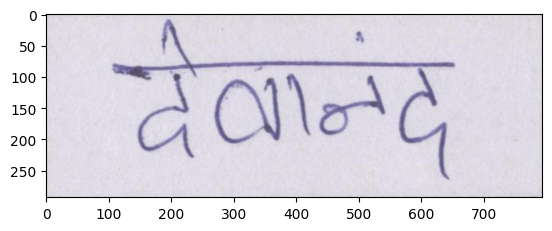

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

image = mpimg.imread( "/kaggle/working/HindiSeg/test/6/95/9.jpg")
plt.imshow(image)
plt.show()